<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap09a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 例題9.1

scikit-learn付属のirisデータについて、SVCで学習した結果を分割学習法と交差確認法で評価し、評価法の特性を把握せよ。

データの準備と表示

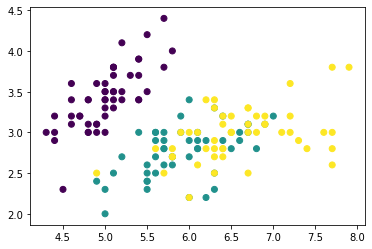

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X = iris.data  #特徴は4次元
y = iris.target #クラスは3つ
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

分割学習法

データを分割するメソッド train_test_split は、実行毎に乱数で分割を変える。分割を変えて評価を何度か実行せよ。

In [2]:
from sklearn.model_selection import train_test_split

for _ in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
  clf = SVC()
  clf.fit(X_train, y_train)
  print(f'accuracy = {clf.score(X_test, y_test):.2}')



accuracy = 0.95
accuracy = 0.95
accuracy = 0.93
accuracy = 0.97
accuracy = 0.96
accuracy = 0.95
accuracy = 0.95
accuracy = 0.92
accuracy = 0.96
accuracy = 0.96


交差確認法

交差確認法に用いる分割は、ShuffleSplit（実行毎に乱数で分割を変える）を用いて行う。分割数を変えて分割学習法自体を何度か実行して評価値のぶれを観察せよ。

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

for _ in range(10):
    clf = SVC()
    cv = ShuffleSplit(n_splits=10)  # n_splits （分割）の値を変化させて安定性を観察
    score = cross_val_score(clf, X, y, cv=cv)
    print(f'mean accuracy = {np.mean(score):.2}')


mean accuracy = 0.96
mean accuracy = 0.95
mean accuracy = 0.95
mean accuracy = 0.95
mean accuracy = 0.95
mean accuracy = 0.98
mean accuracy = 0.94
mean accuracy = 0.97
mean accuracy = 0.95
mean accuracy = 0.98
